In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

ds = pd.read_csv('AB_NYC_2019.csv')

In [2]:
ds

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
ds.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
ds.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
'''Avem valori de NULL pt name, host_name, last review, reviews/month. Ca sa scapam de valori, gasim inlocuitori
ex: Putem in loc de NULL pt name si host_name sa avem valoarea 'No name'
Pentru last review putem spune 'Never Reviewed', iar pentru reviews/month putem pune valoarea 0'''
ds.fillna({'reviews_per_month':0}, inplace=True)
ds.fillna({'name':"No name"}, inplace=True)
ds.fillna({'host_name':"No name"}, inplace=True)
ds.fillna({'last_review':"No review"}, inplace=True)

In [6]:
ds.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
ds["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

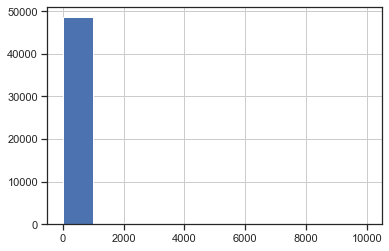

In [8]:
histograma_pret=ds["price"].hist()

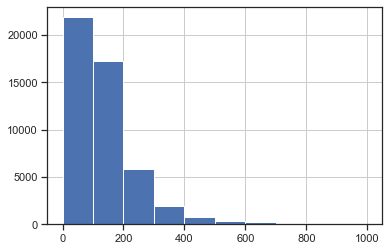

In [9]:
'''majoritatea preturilor sunt sub 1000, un procent nesemnificativ il gasim intre 1000 si 2000, deci, pentru a avea o histograma
mai clara, vom folosi valorile de sub 1000'''
hist_price1=ds["price"][ds["price"]<1000].hist()

In [10]:
ds[ds["price"]>1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,No review,0.00,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,No review,0.00,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,No review,0.00,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,No review,0.00,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,No review,0.00,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,No review,0.00,1,349


In [11]:
#239 de valori dintr-un total de 48895 => am putea scapa de ele. Sunt valori de peste 2000 -> preturi exagerate, posibile erori?
ds=ds[ds["price"]<1000]

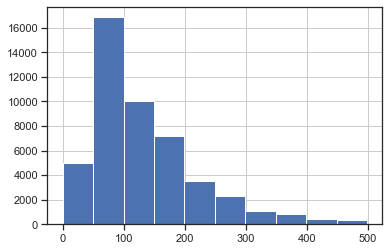

In [12]:
histograma_pret2=ds["price"][ds["price"]<500].hist()

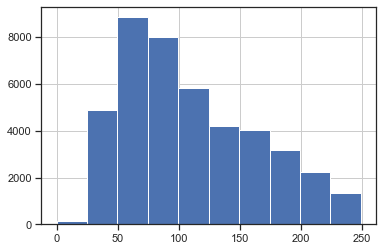

In [13]:
histograma_pret2=ds["price"][ds["price"]<250].hist()

In [14]:
#histograma pentru preturile sub 250 pare sa aiba o distributie mai normala (Gaussiana)
#am putea folosi valoarea pretului de 250 din dataset-ul nostru ca threshold
ds[ds["price"]<250]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No review,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,No review,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,No review,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,No review,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,No review,0.00,6,2


In [15]:
#Ramanem cu 42669 de valori din cele 48895 initiale. Good enough
ds=ds[ds["price"]<250]

In [16]:
ds["price"].describe()

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [17]:
'''se poate observa ca, fata de inceput, cand media era 152 si maximul 10000.000000
am reusit sa aducem dataset-ul la o valoare medie de 107, cu un maxim de 249, deci o distributie relativ normala'''

'se poate observa ca, fata de inceput, cand media era 152 si maximul 10000.000000\nam reusit sa aducem dataset-ul la o valoare medie de 107, cu un maxim de 249, deci o distributie relativ normala'

In [18]:
ds["neighbourhood"].value_counts()

Bedford-Stuyvesant    3560
Williamsburg          3451
Harlem                2487
Bushwick              2404
Upper West Side       1570
                      ... 
Neponsit                 1
Willowbrook              1
New Dorp                 1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 219, dtype: int64

In [19]:
ds["neighbourhood_group"].value_counts()

Brooklyn         18581
Manhattan        17270
Queens            5413
Bronx             1052
Staten Island      353
Name: neighbourhood_group, dtype: int64

In [24]:
counter=ds.groupby("neighbourhood").filter(lambda x: x["neighbourhood"].count()==1)
len(counter["neighbourhood"])

5

In [25]:
#avem 5 valori din neighbourhood care apar o singura data => cu siguranta pot fi eliminate
#putem incerca sa mai curatam din dataset, cautam o valoare de threshold si pentru neighbourhood 
#ex: Pastram doar valorile de peste 100-200
counter=ds.groupby("neighbourhood").filter(lambda x: x["neighbourhood"].count()>150)
len(counter["neighbourhood"])

37358

In [20]:
'''neighbourhood group are doar 5 valori, dintre care Brooklyn si Manhattan sunt majoritare => am putea crea o valoare
medie a pretului in functie de neighbourhood group'''
pret_ng=ds.groupby("neighbourhood_group")["price"].mean()
pret_ng

neighbourhood_group
Bronx             73.796578
Brooklyn          98.068134
Manhattan        128.670990
Queens            83.639941
Staten Island     82.606232
Name: price, dtype: float64

In [21]:
#Se poate observa ca Manhattan este cel mai scump cartier din NYC
ds["room_type"].value_counts()

Private room       21753
Entire home/apt    19790
Shared room         1126
Name: room_type, dtype: int64

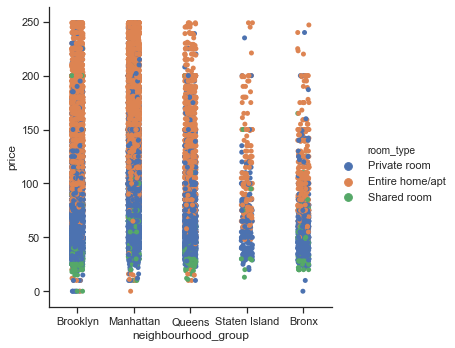

In [22]:
#Putem folosi plotting pentru a analiza distributia pretului in functie de fiecare cartier si tipul de camera
catplot=sns.catplot(x="neighbourhood_group",y="price",hue="room_type",data=ds,kind='strip')

In [23]:
'''Dupa cum era de asteptat, cel mai scump tip de camera este entire home, dupa care urmeaza private room, iar apoi shared.
De asemenea, putem observa ca in Manhattan si in Brooklyn intalnim cele mai multe camere al caror pret depaseste valoarea de 150
So, clearly, Manhattan si Brooklyn sunt cele mai busy, cum era si de asteptat, fiind cele mai importante cartiere din NYC'''

'Dupa cum era de asteptat, cel mai scump tip de camera este entire home, dupa care urmeaza private room, iar apoi shared.\nDe asemenea, putem observa ca in Manhattan si in Brooklyn intalnim cele mai multe camere al caror pret depaseste valoarea de 150\nSo, clearly, Manhattan si Brooklyn sunt cele mai busy, cum era si de asteptat, fiind cele mai importante cartiere din NYC'

In [24]:
'''Verific host_id, semnificatie, numar de aparitii, daca sunt valori care se repeta, maybe cleaning'''
h_id=ds.groupby(["host_id"])
max(h_id.size())

238

In [25]:
h_id.size().value_counts().head()

1    28391
2     2993
3      844
4      302
5      151
dtype: int64

In [26]:
h_id.size().value_counts().tail()

45     1
30     1
238    1
16     1
87     1
dtype: int64

In [27]:
#deci, avem unele host_id care se repeta pana si de 238 de ori
h_id_counter=ds["host_id"].value_counts()
max_h_id=h_id_counter.idxmax()
max_h_id

219517861

In [28]:
ds[ds["host_id"]==max_h_id]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39771,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,2019-06-08,0.94,327,137
39772,30937595,Sonder | 11th Ave | Bright 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,185,29,1,2019-06-20,1.00,327,281
39773,30937596,Sonder | 11th Ave | Contemporary 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,2019-06-10,1.00,327,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47686,35869234,Sonder | 116 John | Classic 1BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70852,-74.00510,Entire home/apt,198,29,0,No review,0.00,327,345
47687,35869466,Sonder | 116 John | Classic Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70802,-74.00642,Entire home/apt,180,29,0,No review,0.00,327,338
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,No review,0.00,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,No review,0.00,327,342


In [29]:
'''Am gasit, deci, host-ul cu cele mai multe listari si anume Sonder (NYC)'''

'Am gasit, deci, host-ul cu cele mai multe listari si anume Sonder (NYC)'

In [30]:
'''Intrucat noi vrem sa realizam o predictie a pretului, coloane precum id si host_name nu ne sunt de folos
Intrucat host_id e integer, e mai convenabil sa lucram cu host_id, decat cu host_name. So, we can drop them'''
ds=ds.drop(columns=["id","host_name"])

In [31]:
'''Next, studiem coloana de name. Ce date ne ofera, care e diferenta de lungime, de ce unele au nume ft lung, altele ft scurt'''
ds["name_len"]=ds["name"].map(str).apply(len)

In [32]:
print(ds["name_len"].max())
print(ds["name_len"].min())
print(ds["name_len"].idxmax())
print(ds["name_len"].idxmin())
max_name=ds["name_len"].idxmax()
min_name=ds["name_len"].idxmin()

179
1
25832
4033


In [33]:
ds.at[max_name,"name"]

'The printing studio bedroom with garden in Bedstuy  !!Brooklyn. Historic neighborhood close to everything ! Full kitchen bathroom BBQ and porch at your disposal. Learn to print !!'

In [34]:
ds.at[min_name,"name"]

'/'

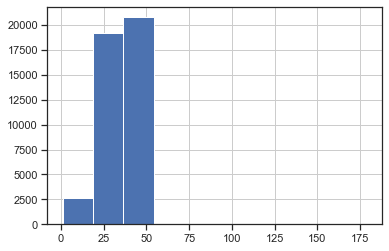

In [35]:
'''Deci, avem si hosts al caror nume nu este dat/specificat. Dar, avem si hosts care includ detalii despre locatie in numele lor
Foarte posibil ca un host al carui nume nu e dat deloc sa nu fie bagat in seama => putine reviews, maybe none at all
=> Exista o corelatie? Let's find out '''
ds.name_len.hist()

In [36]:
#Putem folosi valorile sub 50 pt plotting
ds["name_len"].corr(ds["number_of_reviews"])

-0.004699215436592434

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


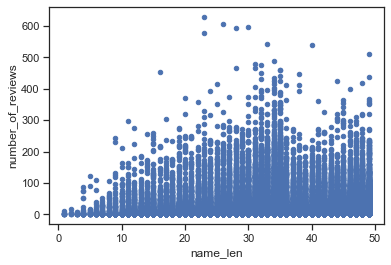

In [37]:
ds[ds["name_len"]<50].plot.scatter(x="name_len", y ="number_of_reviews" )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.05630721093283741

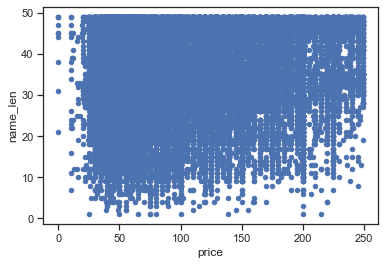

In [45]:
'''Welp... not really
Incercam intre price si name'''
ds[ds["name_len"]<50].plot.scatter(x="price", y ="name_len")
ds["name_len"].corr(ds["price"])

In [38]:
'''Just to be sure, vom face un mean value pe room type
Expectations: entire room - most expensive, then private room, and finally, shared room- cheapest'''
ds["room_type"].value_counts()

Private room       21753
Entire home/apt    19790
Shared room         1126
Name: room_type, dtype: int64

In [39]:
rt_mean=ds.groupby("room_type")["price"].mean()
rt_mean

room_type
Entire home/apt    144.977211
Private room        76.802832
Shared room         56.925400
Name: price, dtype: float64

In [48]:
'''Just as we expected'''

'Just as we expected'

In [40]:
'''Next thing: minimum nights - semnificatie, valori, cleaning?'''
ds["minimum_nights"].describe()

count    42669.000000
mean         6.856359
std         19.981924
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

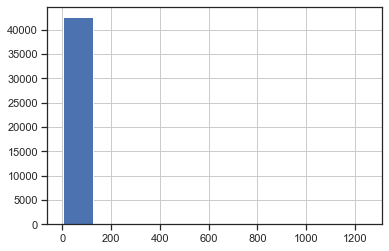

In [50]:
#Again, range e intre 1 noapte si 1250 de nopti, dar media e de 6.85... 
#O sa lucrez cu o histograma pana cand observ valori normale
ds["minimum_nights"].hist()

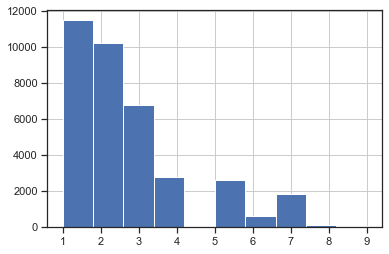

In [51]:
hist_mn1=ds["minimum_nights"][ds["minimum_nights"]<10].hist()

count     628.000000
mean       99.186306
std       118.882672
min        31.000000
25%        31.000000
50%        60.000000
75%        94.250000
max      1250.000000
Name: minimum_nights, dtype: float64

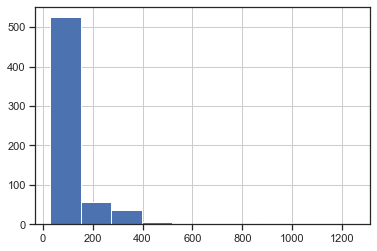

In [52]:
hist_mn2=ds["minimum_nights"][ds["minimum_nights"]>30].hist()
ds["minimum_nights"][ds["minimum_nights"]>30].describe()

In [41]:
'''Intrucat oricum majoritatea datelor sunt sub 30 de nopti, ca sa nu renunt de tot la date, voi inlocui valorile de peste 30
cu valoarea 30'''
ds.loc[(ds.minimum_nights>30),"minimum_nights"]=30

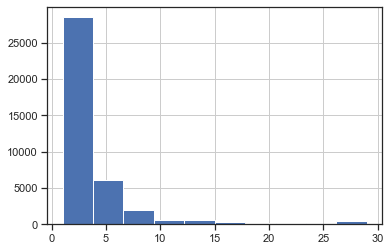

In [42]:
hist_mn3=ds["minimum_nights"][ds["minimum_nights"]<30].hist()
hist_mn3

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.05955436171912435

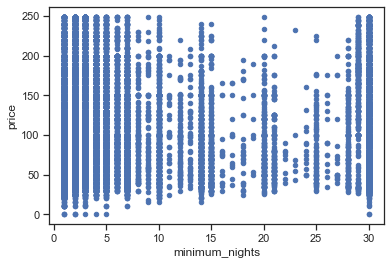

In [55]:
'''Posibil sa gasim din nou o corelatie cu pretul? Maybe in functie de pret exista o relatie cu numarul minim de nopti'''
ds.plot.scatter(x="minimum_nights",y="price")
ds["minimum_nights"].corr(ds["price"])

In [56]:
'''One more thing, availability_365? Probabil se refera la disponibilitatea pe tot anul, dar mai bine sa analizam'''
ds["availability_365"].describe()

count    42669.000000
mean       107.622747
std        129.731981
min          0.000000
25%          0.000000
50%         37.000000
75%        211.000000
max        365.000000
Name: availability_365, dtype: float64

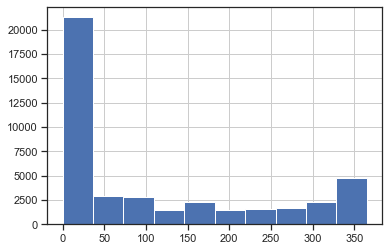

In [57]:
ds["availability_365"].hist()

In [58]:
#Valoarea medie pare sa fie una ok, nu sunt exagerari si dupa valori, cel mai probabil we guessed right its meaning


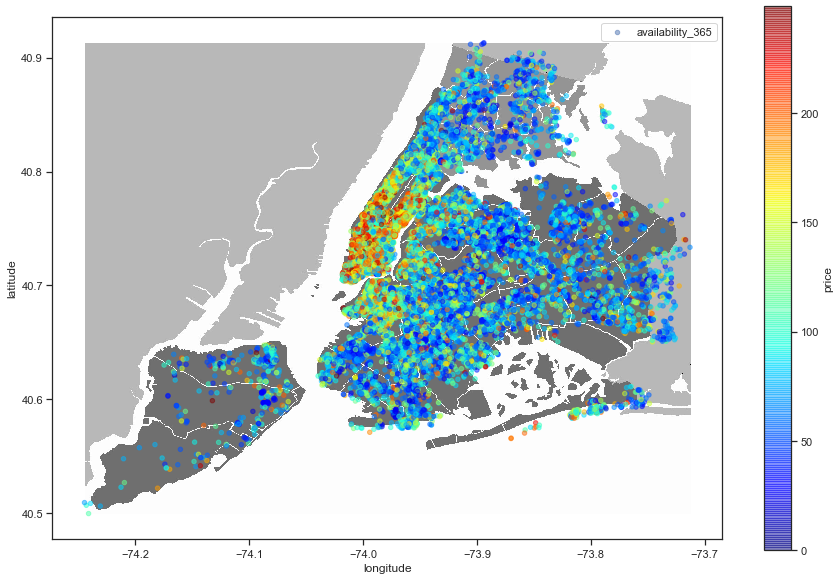

In [59]:
from PIL import Image 
import matplotlib.pyplot as plt
img=Image.open('New_York_City_.png')
plt.figure(figsize=(15,10))
xmax=ds["longitude"].max()
xmin=ds["longitude"].min()
ymax=ds["latitude"].max()
ymin=ds["latitude"].min()
plt.imshow(img,zorder=0,extent=[xmin,xmax,ymin,ymax])
ax=plt.gca()
ds.plot(kind='scatter',x='longitude',y='latitude',label='availability_365',c='price',ax=ax, 
           cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.5,zorder=1)
plt.legend()
plt.show()

In [60]:
#Heatmap facut pentru a vizualiza pe harta NYC cum arata host-urile in functie de pret si availability
#=> Se pot vedea zonele de interes, unde se calatoreste mai mult, dar si unde e mai scumpa cazarea

Now, time to get rid of what isn't that useful -> name, last_review (pastram doar nr of reviews), latitudine si longitudine
(nu ne ajuta cu absolut nimic pt predictie) si host_id

In [43]:
ds.drop(["name","last_review","latitude","longitude","host_id"],axis=1,inplace=True)

In [44]:
ds

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_len
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,34
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,21
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365,35
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,31
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,48
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9,47
48891,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36,45
48892,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27,39
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2,36


In [63]:
ds.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
name_len                            int64
dtype: object

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_len'],
      dtype='object')

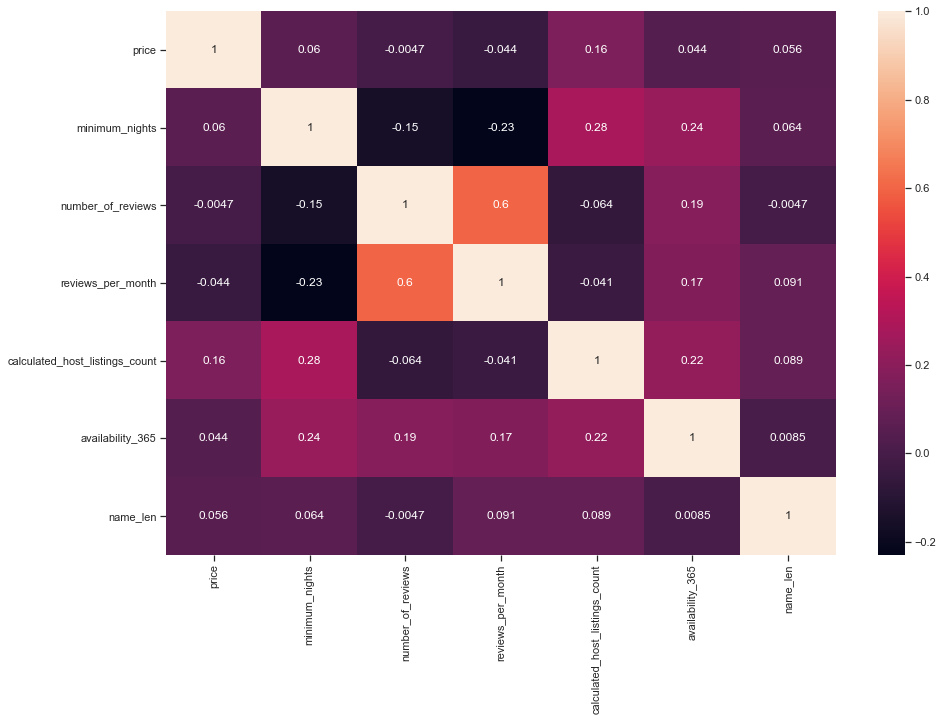

In [45]:
#Matricea de corelatie
correlation=ds.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
ds.columns